В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [264]:
medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [265]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(np.mean(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [266]:
# МНК
X = non_smoker_df['age']
y = non_smoker_df['charges']

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

MNK_coefs = normal_equations(X_with_intercept, y)
y_predict_MNK = np.dot(X_with_intercept, MNK_coefs)
rmse_MNK = rmse(y, y_predict_MNK)

print(f"Коефіцієнти: m = {MNK_coefs[1]}, b = {MNK_coefs[0]}")
print(f"RMSE: {rmse_MNK}")

Коефіцієнти: m = 267.24891283119973, b = -2091.4205565650796
RMSE: 4662.505766636395


lr = 0.0005
Коефіцієнти: m = 267.0847181521504, b = -2084.128067164547
RMSE: 4662.506412632778

lr = 0.0001
Коефіцієнти: m = 252.03447567755867, b = -1415.6914627809958
RMSE: 4668.049031749274

lr = 1e-05
Коефіцієнти: m = 225.10031594568287, b = -219.44639872346897
RMSE: 4704.8807110035095



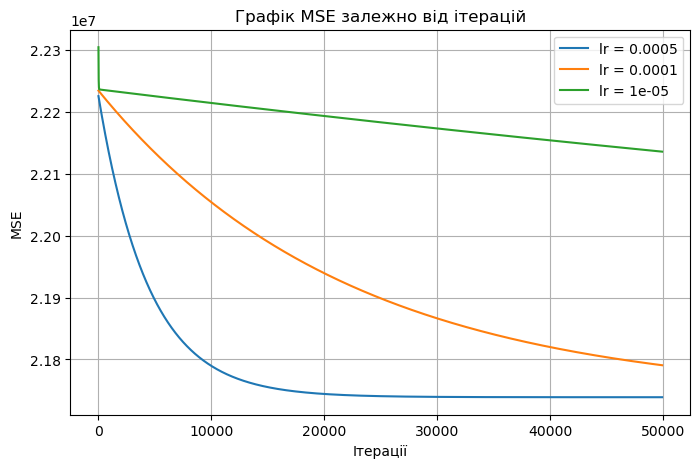

In [267]:
# Градієнтний спуск
X_expand = np.expand_dims(X, axis=1)
best_rmse = np.inf
lrs = [0.0005, 0.0001, 0.00001]
plt.figure(figsize=(8, 5))

for lr in lrs:
    m, b, errors = full_batch_gradient_descent(X_expand, y, lr=lr, epochs=50000)
    y_predict_GD = m * X + b
    rmse_GD = rmse(y, y_predict_GD)

    if rmse_GD < best_rmse:
        best_rmse = rmse_GD
        y_predict_GD_best = m * X + b

    print(f'lr = {lr}')
    print(f"Коефіцієнти: m = {m}, b = {b}")
    print(f"RMSE: {rmse_GD}\n")
    plt.plot(errors[100:], label=f'lr = {lr}')
    
plt.title("Графік MSE залежно від ітерацій")
plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

***Бачимо, що найоптимальніший підібраний learning rate = 0.0005, адже з ним помилка швидко падає. Інші два значення learning rate є замалими, тому збіжність є повільною і за задану кількість ітерацій метод не встигає досягти мінімуму.***

In [268]:
# За допомогою scikit-learn
lin_reg = LinearRegression()
X_frame = X.to_frame()
lin_reg.fit(X_frame, y)

y_predict_sklearn = lin_reg.predict(X_frame)
rmse_sklearn = root_mean_squared_error(y, y_predict_sklearn)

print(f"Коефіцієнти: m = {lin_reg.coef_[0]}, b = {lin_reg.intercept_}")
print(f"RMSE: {rmse_sklearn}")

Коефіцієнти: m = 267.2489128311981, b = -2091.4205565650245
RMSE: 4662.505766636395


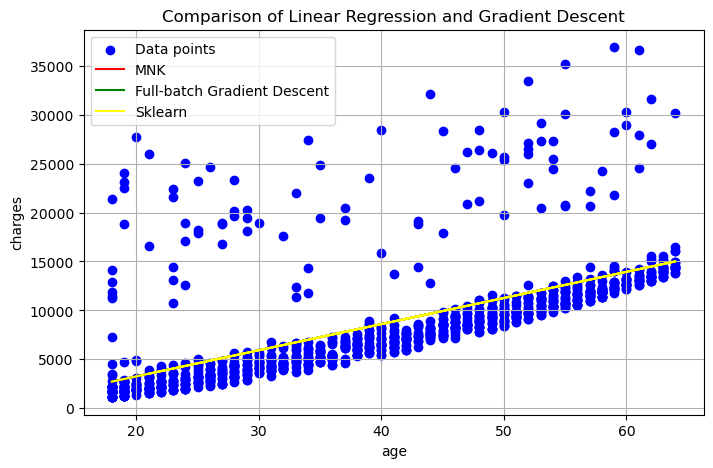

In [269]:
# Візуалізація результатів
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict_MNK, color='red', label='MNK')
plt.plot(X, y_predict_GD_best, color='green', label='Full-batch Gradient Descent')
plt.plot(X, y_predict_sklearn, color='yellow', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

***Отже, можемо зробити висновок, що МНК, розрахований вручну, та розрахунки за допомогою sklearn дають однакові результати (адже реалізація лінійної регресії у sklearn відбувається теж за допомогою методу найменших квадратів).***  
***Результати цих методів: m = 267.2489, b = -2091.4206, RMSE = 4662.5058***

***За допомогою Градієнтного спуску вдалося підібрати параметр lr = 0.0005, який при кількості ітерацій в 50000 дає наступні результати:***  
***m = 267.0847, b = -2084.1281, RMSE = 4662.5064***  
***Враховуючи, що для досягнення цих результатів нам знадобилось 50000 ітерацій, цей метод зайняв більше часу виконання, ніж МНК. Тобто, можна зробити висновок, що для задачі з однією вхідною ознакою та невеликою кількістю даних метод МНК є оптимальнішим варіантом.***


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [270]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = smoker_df['age']
y = smoker_df['charges']

lin_reg = LinearRegression()
X_frame = X.to_frame()
lin_reg.fit(X_frame, y)

y_predict = lin_reg.predict(X_frame)
rmse_sklearn = root_mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict)

print(f"Коефіцієнти: m = {lin_reg.coef_[0]}, b = {lin_reg.intercept_}")
print(f"RMSE: {rmse_sklearn}")
print(f"STD: {np.std(y)}")
print(f"R²: {r2}")

Коефіцієнти: m = 305.23760210982874, b = 20294.12812691597
RMSE: 10711.00334810241
STD: 11520.466706529429
R²: 0.13558924096084068


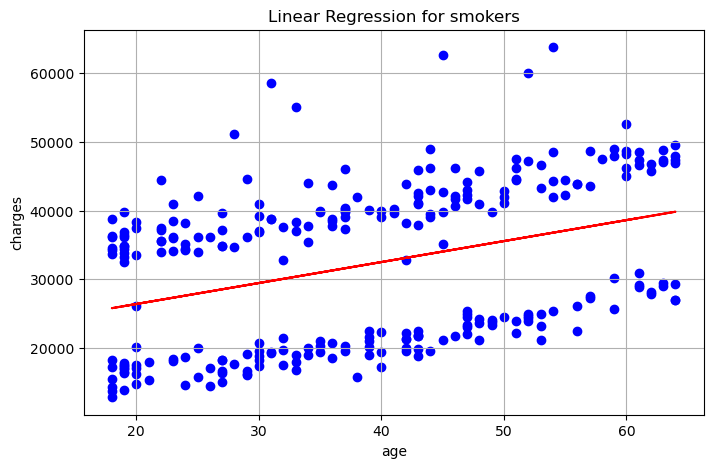

In [271]:
# Візуалізація моделі
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict, color='red')
plt.title('Linear Regression for smokers')
plt.xlabel('age')
plt.ylabel('charges')
plt.grid(True)
plt.show()

***Враховуючи метрики RMSE = 10711.00 (дуже близьке до стандартного відхилення STD = 11520.47) - тобто модель помиляється майже на рівні типового розкиду даних, а коефіцієнт детермінації R² = 0.1356 - досить низьке, що вказує на погану якість моделі і те, що її не варто використовувати в компанії. На графіку бачимо, що дані згруповані на 2 окремі тенденції, тому доцільно дослідити, які ще є фактори, котрі можуть впливати на це.***